In [1]:
from keras.applications import InceptionV3

In [2]:
IMG_SIZE = 128

# model = InceptionV3(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
#     name="inception_v3",
# )

model = InceptionV3(include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)

In [3]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 63, 63, 32)           0         ['batch_normalizati

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

feat_extractor = Sequential(name="Custom Inception v3 Feature Extractor")
# for i, layer in enumerate(model.layers):
#     if (i != len(model.layers) - 1):
#         feat_extractor.add(layer)

# Assume `model` is your pre-loaded Functional model
feat_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
feat_extractor.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 63, 63, 32)           0         ['batch_normalization[0]

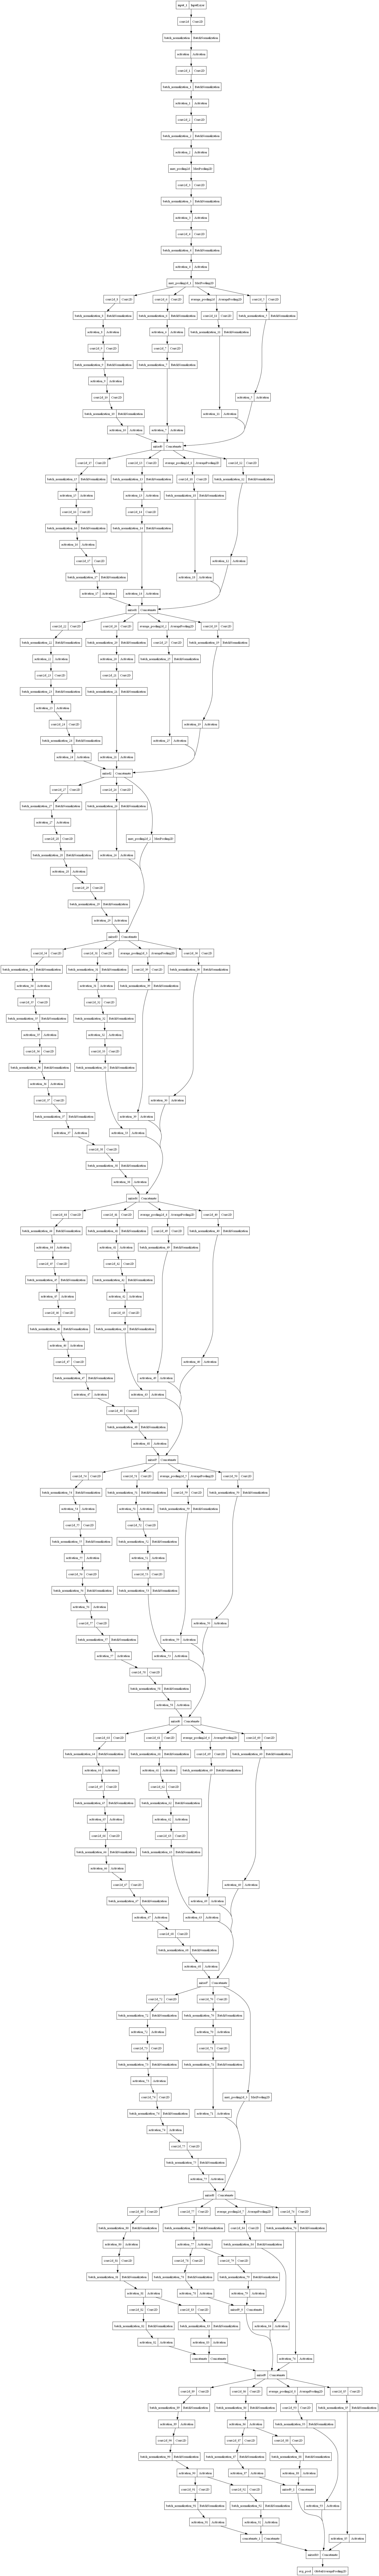

In [9]:
from keras.utils import plot_model
plot_model(feat_extractor, to_file='feature_extractor_inception_v3.png')

In [15]:
# Test forward pass
import numpy as np
subimage_data = np.load('../data_collection/data/img_data_20241030_0130.npy')
gesture_seq   = subimage_data[0]
print(gesture_seq.shape)

#output = np.zeros((10, 1000))
output = np.zeros((10, 2048))

for i in range(gesture_seq.shape[3]):
    subimg = np.expand_dims(gesture_seq[:, :, :, i], 0)
    #output[i] = model.predict(subimg)
    output[i] = feat_extractor.predict(subimg)

print(output.shape)
print(output[0, :20])

(128, 128, 3, 10)
1/1 [==============================] - 0s 110ms/step
(10, 2048)
[0.02071851 0.0101321  0.         0.01668481 0.00439294 0.
 0.09951904 0.         0.         0.         0.         0.07310475
 0.         0.01860503 0.03004447 0.05750549 0.03527012 0.
 0.         0.06161605]
